In [1]:
from importlib import reload

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score, pairwise

import project_path
from src.data import synthetic
from src.graphlearning import multiview, singleview
from src.associations import correlation, zikendall, proprho

ModuleNotFoundError: No module named 'sklearn'

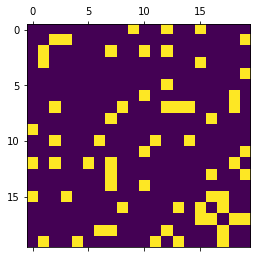

In [4]:
n_nodes = 20
density = 0.2
n_signals = 100

G, X = synthetic.gen_smooth_gs_er(n_nodes, density, n_signals)

g = nx.to_numpy_array(G)[np.triu_indices(n_nodes, k=1)]

plt.matshow(nx.to_numpy_array(G))

In [ ]:
reload(singleview)

K1 = X@X.T
k1 = K1[np.triu_indices_from(K1, k=1)]
k1 /= np.max(k1)
d1 = np.diag(K1)/np.max(K1)

alpha_dot = np.arange(0.01, 1.0, 0.01)
auprc_dot = np.zeros(len(alpha_dot))
print("_"*len(alpha_dot))
for i in range(len(alpha_dot)):
    l = singleview.unsigned(k1, d1, alpha_dot[i])

    auprc_dot[i] = average_precision_score(g, l)

    print("X", end="")

___________________________________________________________________________________________________
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

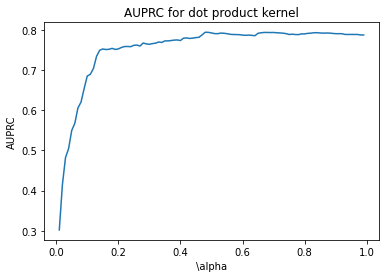

In [ ]:
plt.plot(alpha_dot, auprc_dot)
plt.title("AUPRC for dot product kernel")
plt.ylabel("AUPRC")
plt.xlabel(r"\alpha");

In [ ]:
reload(singleview)

K2 = pairwise.rbf_kernel(X, gamma=0.001)
k2 = K2[np.triu_indices_from(K2, k=1)]
k2 /= np.max(k2)
d2 = np.diag(K2)/np.max(k2)

alpha_rbf = np.arange(0.02, 1.0, 0.01)
auprc_rbf = np.zeros(len(alpha_rbf))
print("_"*len(alpha_rbf))
for i in range(len(alpha_rbf)):
    l = singleview.unsigned(k2, d2, alpha_rbf[i])

    auprc_rbf[i] = average_precision_score(g, l)

    print("X", end="")

__________________________________________________________________________________________________
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

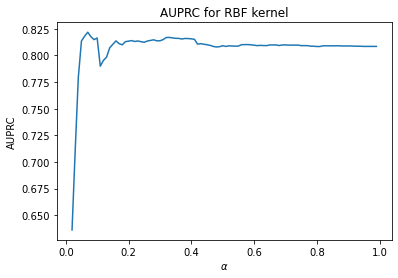

In [ ]:
plt.plot(alpha_rbf, auprc_rbf)
plt.title("AUPRC for RBF kernel")
plt.ylabel("AUPRC")
plt.xlabel(r"$\alpha$");

In [ ]:
K3 = pairwise.polynomial_kernel(X)
k3 = K3[np.triu_indices_from(K3, k=1)]
k3 /= np.max(k3)
d3 = np.diag(K2)/np.max(k3)

alpha_poly = np.arange(0.02, 1.0, 0.01)
auprc_poly = np.zeros(len(alpha_poly))
print("_"*len(alpha_poly))
for i in range(len(alpha_poly)):
    l = singleview.unsigned(k3, d3, alpha_poly[i])

    auprc_poly[i] = average_precision_score(g, l)

    print("X", end="")

__________________________________________________________________________________________________
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

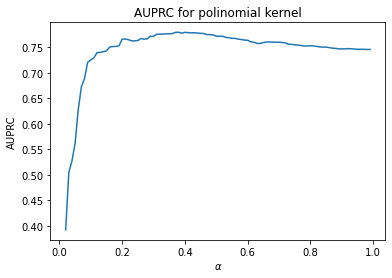

In [ ]:
plt.plot(alpha_poly, auprc_poly)
plt.title("AUPRC for polinomial kernel")
plt.ylabel("AUPRC")
plt.xlabel(r"$\alpha$");

In [ ]:
reload(multiview)

alpha_mk = np.arange(0.01, 1.01, 0.01)
auprc_mk = np.zeros(len(alpha_mk))

print("_"*len(alpha_mk))
for i in range(len(alpha_mk)):  
    lis, l = multiview.unsigned([k1, k2, k3], [d1, d2, d3], alpha_mk[i], 1)

    auprc_mk[i] = average_precision_score(g, -l)

    print("X", end="")

____________________________________________________________________________________________________
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

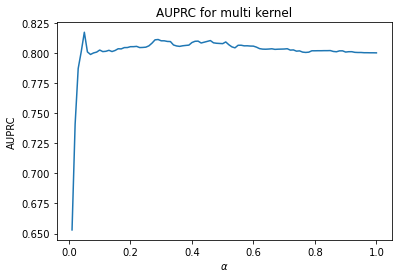

In [ ]:
plt.plot(alpha_mk, auprc_mk)
plt.title("AUPRC for multi kernel")
plt.ylabel("AUPRC")
plt.xlabel(r"$\alpha$");

In [ ]:
np.max(auprc_rbf)

0.8217618855441344

# **Experiment with Simulated scRNAseq**

In [ ]:
data_folder 